In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("C:\\Users\\write\\Desktop\\GCP Projects\\GCP Project 7 CI-CD\\artifacts\\raw\\data.csv")

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df.drop("Id", axis = 1, inplace=True)

<Axes: >

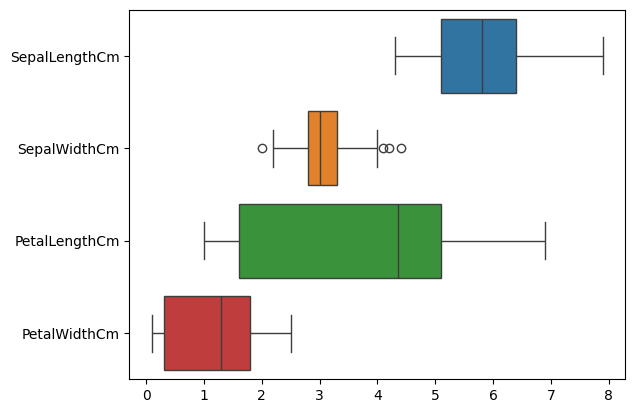

In [13]:
sns.boxplot(df, orient= "h")

## Model Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
X = df[list(df.columns.values)[:-1]]
y = df["Species"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=30, random_state=42)

In [32]:
tree_clf.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=30, random_state=42)

In [34]:
y_pred = tree_clf.predict(X_test)

In [39]:
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
print(accuracy)

1.0


In [38]:
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(conf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


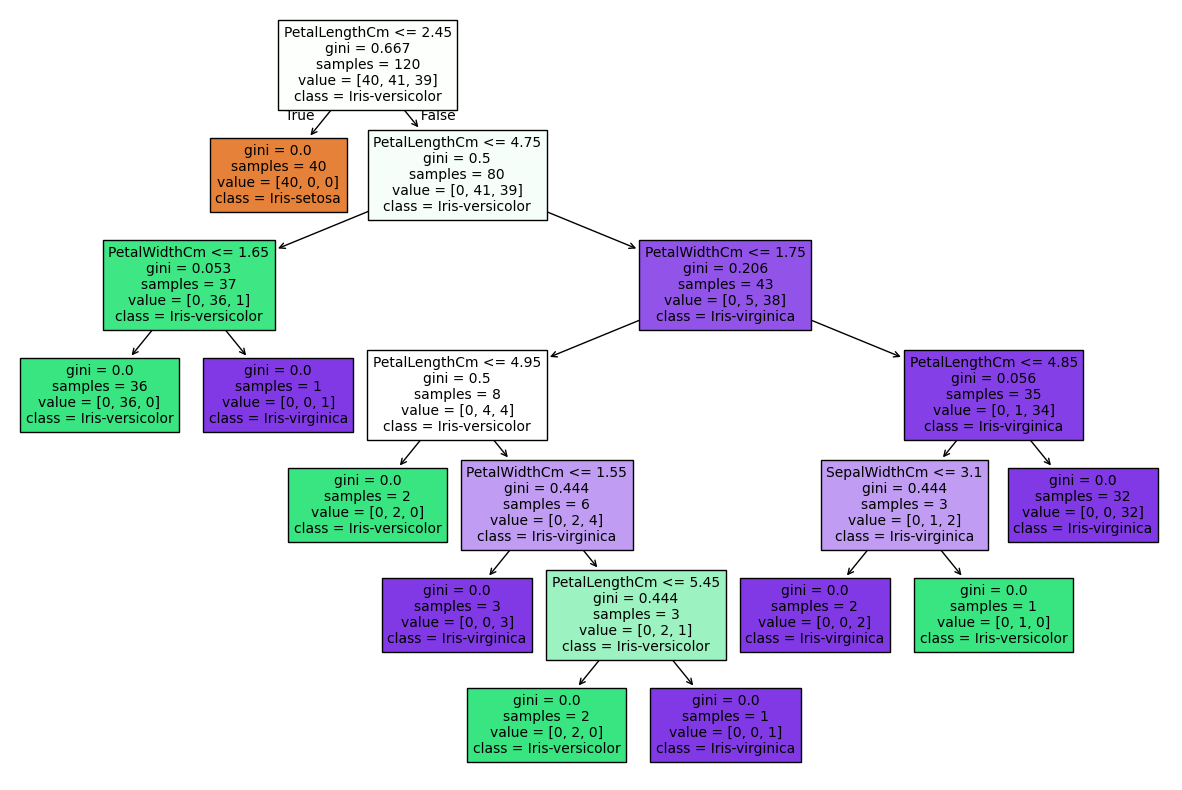

In [41]:
plt.figure(figsize=(15, 10))
plot_tree(tree_clf,
          filled=True,
          feature_names=X.columns,
          class_names=tree_clf.classes_)

plt.show()

In [43]:
df.columns, tree_clf.feature_importances_

(Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'),
 array([0.        , 0.01667014, 0.90614339, 0.07718647]))